In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Pre-Processing

In [18]:
# Read the dataset
df = pd.read_csv("CGU_Dataset-5.csv")

In [19]:
df.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,CLASS
0,2,0,3,4,0,0,4,2,0.25,2,...,9,0.22,15,27,10,12,9,0.00,8,N
1,3,3,5,3,0,1,6,3,0.27,2,...,12,0.19,34,51,15,12,16,8.33,11,N
2,4,11,43,16,0,4,76,22,0.21,34,...,99,0.18,208,349,51,24,119,3.74,103,N
3,6,0,3,6,0,0,4,2,0.13,2,...,12,0.12,32,49,17,16,17,0.00,16,N
4,7,2,3,7,0,6,4,2,0.11,2,...,14,0.07,33,49,18,11,27,25.00,18,N


In [20]:
df['CLASS']=df['CLASS'].map({'N':0,'Y':1})

In [21]:
df.shape

(194, 41)

In [22]:
df.head()

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,CLASS
0,2,0,3,4,0,0,4,2,0.25,2,...,9,0.22,15,27,10,12,9,0.00,8,0
1,3,3,5,3,0,1,6,3,0.27,2,...,12,0.19,34,51,15,12,16,8.33,11,0
2,4,11,43,16,0,4,76,22,0.21,34,...,99,0.18,208,349,51,24,119,3.74,103,0
3,6,0,3,6,0,0,4,2,0.13,2,...,12,0.12,32,49,17,16,17,0.00,16,0
4,7,2,3,7,0,6,4,2,0.11,2,...,14,0.07,33,49,18,11,27,25.00,18,0


In [23]:
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
GLOBAL_DATA_COMPLEXITY             0
GLOBAL_DATA_DENSITY                0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_P

In [24]:
# Separate the target variable (assuming 'class' is the column name)
X = df.drop('CLASS', axis=1)
y = df['CLASS']

In [25]:
X

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
0,2,0,3,4,0,0,4,2,0.25,2,...,2,9,0.22,15,27,10,12,9,0.00,8
1,3,3,5,3,0,1,6,3,0.27,2,...,3,12,0.19,34,51,15,12,16,8.33,11
2,4,11,43,16,0,4,76,22,0.21,34,...,38,99,0.18,208,349,51,24,119,3.74,103
3,6,0,3,6,0,0,4,2,0.13,2,...,2,12,0.12,32,49,17,16,17,0.00,16
4,7,2,3,7,0,6,4,2,0.11,2,...,2,14,0.07,33,49,18,11,27,25.00,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,152,21,30,25,1,3,26,18,0.16,12,...,13,99,0.13,219,378,69,24,138,3.45,113
190,153,12,24,16,0,6,38,13,0.22,18,...,19,66,0.16,125,226,53,29,79,9.23,59
191,155,27,51,45,3,2,62,30,0.14,30,...,31,201,0.12,556,857,158,31,246,2.31,214
192,159,2,5,6,0,7,8,3,0.25,4,...,4,14,0.13,21,44,13,13,23,36.84,12


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
189    1
190    1
191    1
192    1
193    1
Name: CLASS, Length: 194, dtype: int64

In [27]:
# Standardize the dataset using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display some rows of the preprocessed data
print("First 5 rows of standardized features (X_train):")
print(X_train[:5])
print("First 5 corresponding target values (y_train):")
print(y_train[:5])

First 5 rows of standardized features (X_train):
[[-0.84818048 -0.83342481 -0.58065791 -0.83307814 -0.27446679 -0.51583308
  -0.42984413 -0.59730942 -0.70104151 -0.40048377 -0.39676677 -0.71995911
  -1.39025323 -0.6685569   0.11473124  2.43794758 -0.4261537   0.04862592
  -0.66973569 -0.81514138 -0.72304209  0.11301786 -0.35336092 -0.46010977
  -0.48452147 -0.62056992 -0.35336006 -0.46128311  2.35467219 -0.45069551
  -0.43054965 -0.6761262  -0.32325758 -0.46250453 -0.49696628 -0.52364086
   0.39474939 -0.52226008 -0.6646898  -0.42805266]
 [-1.00888836  0.03305114 -0.779682   -0.44949311 -0.27446679 -0.30647823
  -0.71109121 -0.7755833  -1.27928152 -0.70516554 -0.39676677 -0.71995911
   0.75856405 -0.56176395 -0.54968252 -0.68411876 -0.45581779  0.04862592
  -0.87828901 -1.70121133 -0.03625377 -0.36483004 -0.32987089 -0.29629
  -0.23445076 -0.11684371 -0.3298694  -0.28839282  0.23884818 -0.70937874
  -0.7117841  -0.52027011 -1.46347523 -0.16705783 -0.27542169 -0.28766798
  -1.03859199 -

In [28]:
X_train

array([[-0.84818048, -0.83342481, -0.58065791, ..., -0.52226008,
        -0.6646898 , -0.42805266],
       [-1.00888836,  0.03305114, -0.779682  , ..., -0.40518305,
        -0.01181499, -0.45737547],
       [-0.58033401,  2.80577421,  3.00177569, ...,  2.40466547,
         0.39447042,  2.29896925],
       ...,
       [ 0.41962613, -0.83342481, -0.779682  , ..., -0.40518305,
         1.88809769, -0.42805266],
       [-0.00892822, -0.48683443, -0.48114586, ..., -0.52226008,
        -0.6646898 , -0.48669829],
       [ 0.61604687,  0.20634634, -0.48114586, ..., -0.28810603,
        -0.13041275, -0.34008421]])

In [29]:
X_test

array([[ 1.36601698e+00, -6.60129621e-01, -2.82121775e-01, ...,
        -3.58352246e-01, -6.64689799e-01, -2.52115760e-01],
       [-1.34816055e+00, -8.33424812e-01, -3.81633819e-01, ...,
        -4.75429268e-01, -6.64689799e-01, -3.98729841e-01],
       [ 1.68743274e+00,  5.52936719e-01,  5.13974579e-01, ...,
         5.54848526e-01,  1.25635911e+00,  3.92986196e-01],
       ...,
       [-3.48200407e-01,  8.99527101e-01,  3.14950491e-01, ...,
         5.31433122e-01, -7.26331098e-05,  5.10277461e-01],
       [-5.26764718e-01,  7.26231910e-01,  2.30519138e+00, ...,
         1.86611117e+00,  2.35192062e+00,  1.44860758e+00],
       [-1.06245765e+00,  3.30511447e-02, -5.80657908e-01, ...,
        -4.75429268e-01,  1.01329241e+00, -5.74666738e-01]])

# WITHOUT DIMENSIONALITY REDUCTION(PCA)
Metrics and ROC curve comparision for defined methods

C:\Users\shubh\AppData\Local\Temp\ipykernel_1504\1119299408.py:48: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shubh\AppData\Local\Temp\ipykernel_1504\1119299408.py:48: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


Epoch 1/10
3/3 [==============================] - 2s 8ms/step - loss: 0.6605 - accuracy: 0.6741
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 0.5427 - accuracy: 0.8148
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.8148
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 0.4491 - accuracy: 0.8222
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 0.4386 - accuracy: 0.8148
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 0.4267 - accuracy: 0.8222
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.4207 - accuracy: 0.8296
Epoch 8/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4115 - accuracy: 0.8296
Epoch 9/10
3/3 [==============================] - 0s 8ms/step - loss: 0.4042 - accuracy: 0.8296
Epoch 10/10
2/2 [==============================] - 0s 18ms/step
Epoch 1/10
3/3 [==============================] - 1s 9ms/step - loss: 0

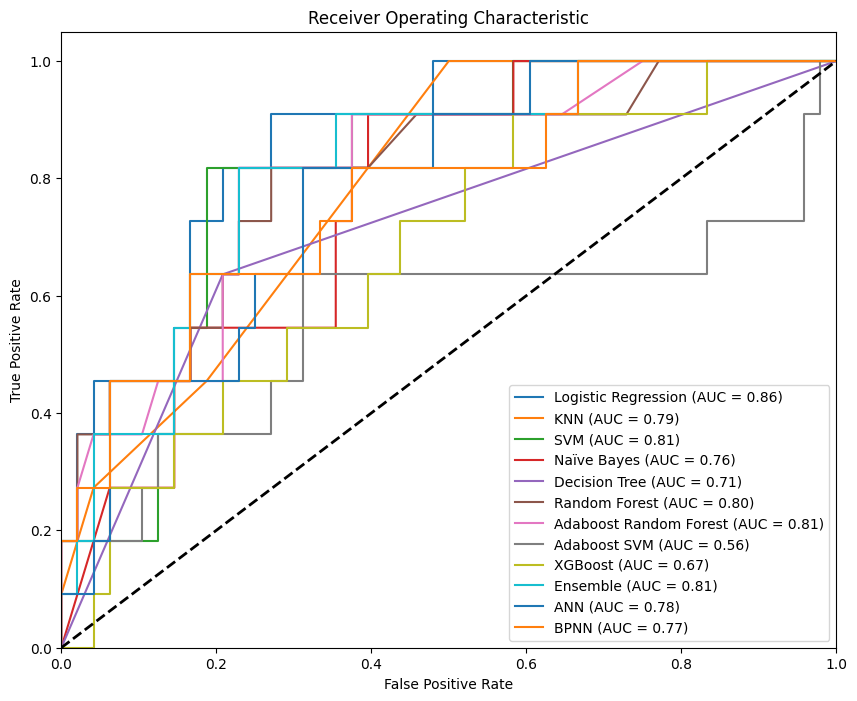

In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Assuming X_train and X_test are your training and testing data from the previous step

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost Random Forest": AdaBoostClassifier(base_estimator=RandomForestClassifier(), random_state=42),
    "Adaboost SVM": AdaBoostClassifier(base_estimator=SVC(probability=True, random_state=42)),
    "XGBoost": xgb.XGBClassifier(),
}

# Train and evaluate models
results = {}
roc_curves = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    mcc = matthews_corrcoef(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1 Score": f1_score,
        "MCC": mcc,
    }

    if y_prob is not None:
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        roc_curves[model_name] = {"fpr": fpr, "tpr": tpr, "AUC": auc}

# Ensemble
ensemble_model = VotingClassifier(estimators=[('NB', GaussianNB()), ('SVM', SVC(probability=True, random_state=42)), ('RF', RandomForestClassifier())], voting='soft')
ensemble_model.fit(X_train, y_train)
y_ensemble_pred = ensemble_model.predict(X_test)
y_ensemble_prob = ensemble_model.predict_proba(X_test)[:, 1]

# Metrics for Ensemble
accuracy = accuracy_score(y_test, y_ensemble_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_ensemble_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
mcc = matthews_corrcoef(y_test, y_ensemble_pred)

results["Ensemble"] = {
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1_score,
    "MCC": mcc,
}

# Compute ROC curve and AUC for Ensemble
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, y_ensemble_prob)
ensemble_auc = roc_auc_score(y_test, y_ensemble_prob)
roc_curves["Ensemble"] = {"fpr": ensemble_fpr, "tpr": ensemble_tpr, "AUC": ensemble_auc}

# Artificial Neural Network (ANN) with Backpropagation (BPNN)
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Predict with ANN
y_ann_prob = model.predict(X_test)
y_ann_pred = (y_ann_prob > 0.5).astype(int).flatten()

# Metrics for ANN
accuracy_ann = accuracy_score(y_test, y_ann_pred)
tn_ann, fp_ann, fn_ann, tp_ann = confusion_matrix(y_test, y_ann_pred).ravel()
sensitivity_ann = tp_ann / (tp_ann + fn_ann)
specificity_ann = tn_ann / (tn_ann + fp_ann)
precision_ann = tp_ann / (tp_ann + fp_ann)
f1_score_ann = 2 * (precision_ann * sensitivity_ann) / (precision_ann + sensitivity_ann)
mcc_ann = matthews_corrcoef(y_test, y_ann_pred)

results["ANN"] = {
    "Accuracy": accuracy_ann,
    "Sensitivity": sensitivity_ann,
    "Specificity": specificity_ann,
    "Precision": precision_ann,
    "F1 Score": f1_score_ann,
    "MCC": mcc_ann,
}
# Compute ROC curve and AUC for ANN
ann_fpr, ann_tpr, _ = roc_curve(y_test, y_ann_prob)
ann_auc = roc_auc_score(y_test, y_ann_prob)
roc_curves["ANN"] = {"fpr": ann_fpr, "tpr": ann_tpr, "AUC": ann_auc}
#model defination
model_bpnn = Sequential()
model_bpnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_bpnn.add(Dense(64, activation='relu'))
model_bpnn.add(Dense(1, activation='sigmoid'))

model_bpnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_bpnn.fit(X_train, y_train, epochs=10, batch_size=64)

# Metrics for BPNN
y_bpnn_prob = model_bpnn.predict(X_test)
y_bpnn_pred = (y_bpnn_prob > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_bpnn_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_bpnn_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
mcc = matthews_corrcoef(y_test, y_bpnn_pred)

results["BPNN"] = {
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1_score,
    "MCC": mcc,
}

# Compute ROC curve and AUC for BPNN
bpnn_fpr, bpnn_tpr, _ = roc_curve(y_test, y_bpnn_prob)
bpnn_auc = roc_auc_score(y_test, y_bpnn_prob)
roc_curves["BPNN"] = {"fpr": bpnn_fpr, "tpr": bpnn_tpr, "AUC": bpnn_auc}

# Print results
for model_name, metrics in results.items():
    print(f"Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, curve_data in roc_curves.items():
    plt.plot(curve_data["fpr"], curve_data["tpr"], label=f'{model_name} (AUC = {curve_data["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

RANDOM FOREST PROVIDES HIGHEST ACCURACY SO WE DRAW CONFUSION MATRIX FOR RANDOM FOREST

In [44]:

# Train Random Forest Model
random_forest_model = models["Random Forest"]
random_forest_model.fit(X_train, y_train)  # Train the Random Forest model
y_rf_pred = random_forest_model.predict(X_test)  # Make predictions
y_rf_prob = random_forest_model.predict_proba(X_test)[:, 1] if hasattr(random_forest_model, "predict_proba") else None

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_rf_pred)
conf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
# Display the Confusion Matrix
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)


Confusion Matrix for Random Forest:
[[47  1]
 [ 9  2]]


# APPLYING DIMENSIONALITY REDUCTION(PCA)

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Perform PCA
num_components = 10  # Adjust this number based on your desired number of components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

# Print explained variance ratio to understand how many components to keep
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios:")
print(explained_variance_ratio)

Explained Variance Ratios:
[0.60887197 0.08626979 0.0502465  0.04501419 0.03601721 0.02903201
 0.02568367 0.02384976 0.01942643 0.01729112]


In [18]:
# Calculate the covariance matrix
covariance_matrix = np.cov(X, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
[-1.22833108e-16  7.49759913e-17  2.20150024e-16  1.75751948e-15
  2.89717006e-13  1.23821372e-05  5.40615942e-05  7.87599993e-05
  2.19504145e-04  3.93856921e-04  6.22170473e-04  2.47415036e-03
  3.64129296e-03  3.96628406e-03  5.42174429e-03  8.28261561e-03
  1.60841046e-02  1.84621485e-02  2.75409694e-02  3.12985509e-02
  3.93737917e-02  5.56929195e-02  8.59002876e-02  1.16397880e-01
  1.69128095e-01  2.04579632e-01  2.47581753e-01  3.52673644e-01
  4.52330009e-01  5.01765851e-01  6.95228284e-01  7.81083456e-01
  9.58933404e-01  1.03266973e+00  1.16729742e+00  1.44815320e+00
  1.80989699e+00  2.02027363e+00  3.46867131e+00  2.44810700e+01]
Eigenvectors:
[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -4.56439546e-02
  -6.72174425e-02  5.05064135e-03]
 [ 9.25406304e-13  1.35111363e-12 -3.87164463e-13 ...  3.76148691e-02
   9.19120778e-02  1.79211861e-01]
 [-4.90829620e-12 -5.05145074e-12  1.80635755e-12 ... -6.37590780e-02
  -1.15633199e-01  1.93600074e-01]
 ...
 [

In [19]:
covariance_matrix

array([[ 1.00012852e+00, -5.08328591e-03,  7.49720257e-03,
        -1.01956727e-02, -7.71330723e-03,  6.78324671e-03,
         1.44870623e-02,  9.26737188e-04,  5.52551321e-03,
        -8.38213869e-03, -2.82464683e-03,  1.11179193e-02,
         3.55392714e-03,  2.27096949e-04, -1.01997211e-03,
         1.11179178e-02,  3.50949947e-03, -3.31181944e-04,
         5.93125161e-04,  1.35156578e-03,  1.12898602e-05,
         2.71480205e-03],
       [-5.08328591e-03,  1.00012852e+00,  5.96136703e-01,
         2.49161902e-01,  6.10076343e-01,  5.53460017e-01,
         5.53806153e-01,  3.78874470e-01,  7.88141474e-01,
         5.21564186e-01,  6.06039149e-01,  6.03229363e-01,
         7.75832183e-01,  7.78089456e-01, -2.81974178e-01,
         6.03229362e-01,  7.75849845e-01,  7.65766829e-01,
         7.77341679e-01,  6.45993803e-01,  4.17608880e-01,
         8.54138901e-01],
       [ 7.49720257e-03,  5.96136703e-01,  1.00012852e+00,
         2.28370410e-01,  4.32452859e-01,  9.68710289e-01,
    

In [19]:
# Display some rows of the dataset after PCA
print("Dataset after PCA:")
print(X_pca[:5])  # Print the first 5 rows (you can adjust the number)

Dataset after PCA:
[[-3.96001027e+00 -9.20111018e-02 -7.72962488e-01 -1.05630687e-02
   7.74660822e-01 -8.99045289e-01  1.41607395e-01  1.45992373e+00
  -8.61851344e-01  1.15479774e+00]
 [-2.78066947e+00  2.34772024e+00  4.23120818e+00 -4.55639845e-01
  -8.17459973e-01  1.29519289e+00 -4.69412463e-01  1.68487258e+00
  -8.71597797e-01 -4.57877091e-01]
 [ 1.17842653e+01  4.74259332e+00 -1.42110860e+00 -1.66923351e+00
  -1.56318896e+00 -2.61499664e+00  1.25156709e+00  1.12720433e+00
  -1.62742937e+00 -2.19194826e-01]
 [-2.89157301e+00 -1.37361612e+00  9.34970086e-02 -1.12944559e+00
   3.40189808e-01 -1.75252197e+00 -8.16928924e-02  1.17053456e+00
  -3.34798713e-01  1.14022117e+00]
 [-2.64986063e+00 -2.33353206e+00  2.55784110e-01 -2.23091226e+00
   1.94670005e+00  6.19244787e-01  2.03507180e-02  6.25756878e-01
  -1.06746213e+00  2.79454370e-01]]


In [20]:
# Split the PCA-transformed dataset into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [21]:
X_train_pca

array([[-2.21273807,  0.98410262,  3.60759921, ...,  0.37724407,
        -0.16216656,  0.58925361],
       [-2.33177937, -2.18901403,  1.18932721, ...,  0.26532727,
        -1.34450444, -0.33988829],
       [13.56317731,  1.2323181 , -1.27697764, ...,  0.5295673 ,
        -1.62120781, -1.70512384],
       ...,
       [-2.47693179, -1.93791751,  0.23667155, ..., -1.08857499,
         0.22641022,  0.1637272 ],
       [-2.89924852, -0.68867144,  0.16513283, ...,  0.13425414,
         0.21033943, -0.53790092],
       [-1.74038036, -1.84465906, -0.4848631 , ..., -0.43523236,
         1.15728038, -0.41970478]])

In [22]:
X_test_pca

array([[-1.99233990e+00, -6.64044436e-01, -6.73931773e-01,
         5.54850005e-01, -1.21289635e+00, -1.97232207e-02,
        -1.67253446e-01, -1.09007576e+00,  6.65703558e-01,
         1.63161058e-01],
       [-2.19219340e+00, -1.58080160e-01,  1.98133192e-01,
        -5.57614516e-01, -3.08398409e+00,  1.09526633e-01,
         8.43358827e-01,  7.97290229e-01, -1.69929232e+00,
         4.32572597e-02],
       [ 2.67960238e+00, -7.21843422e-01, -1.34027749e+00,
        -1.20850352e+00, -1.34331778e+00,  9.38625156e-01,
        -1.24629625e+00, -1.82177556e+00, -3.38972287e-01,
        -9.02713629e-02],
       [-2.73730316e+00,  1.05479651e+00,  2.92234322e+00,
         8.58145650e-02,  7.11345337e-01, -1.39023769e+00,
         5.79175750e-01, -1.00490983e+00, -6.51521196e-01,
        -2.48280226e-01],
       [ 2.54427280e+01, -1.66707089e+00,  9.86387675e-01,
         3.45910307e+00,  4.06626413e+00,  3.05896259e+00,
        -2.08220989e+00,  8.89143281e-01, -2.26418413e+00,
         8.

# WITH DIMENSIONALITY REDUCTION(PCA)

### Metrics and ROC curve comparision for defined methods

C:\Users\shubh\AppData\Local\Temp\ipykernel_9160\1370154612.py:30: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\shubh\AppData\Local\Temp\ipykernel_9160\1370154612.py:30: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


Epoch 1/10
3/3 [==============================] - 2s 14ms/step - loss: 0.5968 - accuracy: 0.7333
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.8074
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 0.4799 - accuracy: 0.8148
Epoch 4/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8148
Epoch 5/10
3/3 [==============================] - 0s 9ms/step - loss: 0.4555 - accuracy: 0.8148
Epoch 6/10
3/3 [==============================] - 0s 8ms/step - loss: 0.4461 - accuracy: 0.8222
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4364 - accuracy: 0.8222
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4255 - accuracy: 0.8148
Epoch 9/10
3/3 [==============================] - 0s 7ms/step - loss: 0.4174 - accuracy: 0.8148
Epoch 10/10
2/2 [==============================] - 0s 11ms/step
Epoch 1/10
3/3 [==============================] - 2s 7ms/step - loss: 0

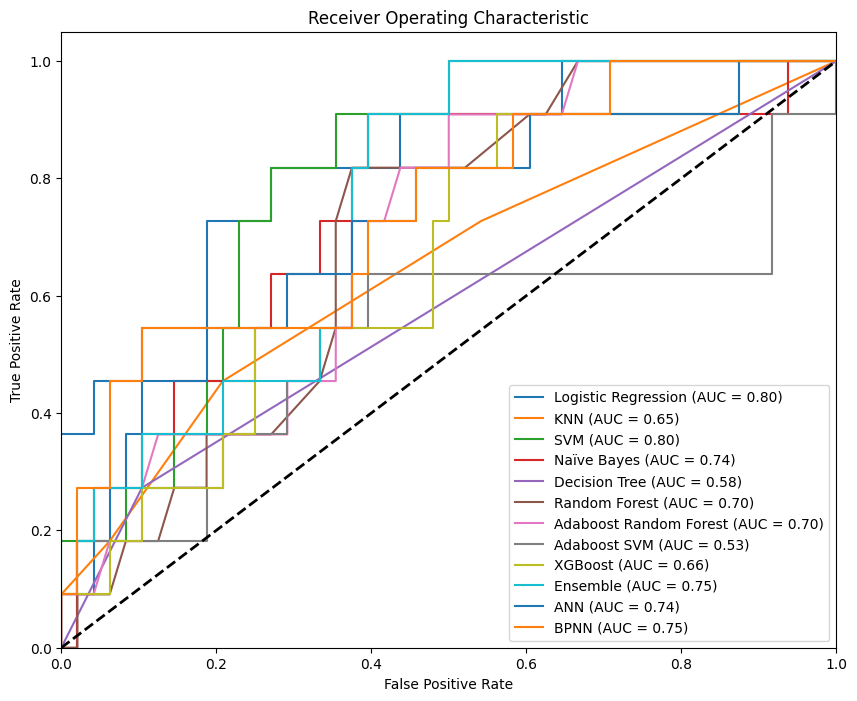

In [24]:


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Naïve Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Adaboost Random Forest": AdaBoostClassifier(base_estimator=RandomForestClassifier(), random_state=42),
    "Adaboost SVM": AdaBoostClassifier(base_estimator=SVC(probability=True, random_state=42)),
    "XGBoost": xgb.XGBClassifier(),
}

# Train and evaluate models
results = {}
roc_curves = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)  # Train the model with PCA-transformed data
    y_pred = model.predict(X_test_pca)  # Make predictions
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_pca)[:, 1]
    else:
        y_prob = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
    mcc = matthews_corrcoef(y_test, y_pred)

    results[model_name] = {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "F1 Score": f1_score,
        "MCC": mcc,
    }

    if y_prob is not None:
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        roc_curves[model_name] = {"fpr": fpr, "tpr": tpr, "AUC": auc}

# Ensemble
ensemble_model = VotingClassifier(estimators=[('NB', GaussianNB()), ('SVM', SVC(probability=True, random_state=42)), ('RF', RandomForestClassifier())], voting='soft')
ensemble_model.fit(X_train_pca, y_train)
y_ensemble_pred = ensemble_model.predict(X_test_pca)
y_ensemble_prob = ensemble_model.predict_proba(X_test_pca)[:, 1]

# Metrics for Ensemble
accuracy = accuracy_score(y_test, y_ensemble_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_ensemble_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)
mcc = matthews_corrcoef(y_test, y_ensemble_pred)

results["Ensemble"] = {
    "Accuracy": accuracy,
    "Sensitivity": sensitivity,
    "Specificity": specificity,
    "Precision": precision,
    "F1 Score": f1_score,
    "MCC": mcc,
}

# Compute ROC curve and AUC for Ensemble
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, y_ensemble_prob)
ensemble_auc = roc_auc_score(y_test, y_ensemble_prob)
roc_curves["Ensemble"] = {"fpr": ensemble_fpr, "tpr": ensemble_tpr, "AUC": ensemble_auc}

# Artificial Neural Network (ANN) with Backpropagation (BPNN)
model_ann = Sequential()
model_ann.add(Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

model_ann.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_ann.fit(X_train_pca, y_train, epochs=10, batch_size=64)

# Predict with ANN
y_ann_prob = model_ann.predict(X_test_pca)
y_ann_pred = (y_ann_prob > 0.5).astype(int).flatten()

# Metrics for ANN
accuracy_ann = accuracy_score(y_test, y_ann_pred)
tn_ann, fp_ann, fn_ann, tp_ann = confusion_matrix(y_test, y_ann_pred).ravel()
sensitivity_ann = tp_ann / (tp_ann + fn_ann)
specificity_ann = tn_ann / (tn_ann + fp_ann)
precision_ann = tp_ann / (tp_ann + fp_ann)
f1_score_ann = 2 * (precision_ann * sensitivity_ann) / (precision_ann + sensitivity_ann)
mcc_ann = matthews_corrcoef(y_test, y_ann_pred)

results["ANN"] = {
    "Accuracy": accuracy_ann,
    "Sensitivity": sensitivity_ann,
    "Specificity": specificity_ann,
    "Precision": precision_ann,
    "F1 Score": f1_score_ann,
    "MCC": mcc_ann,
}

# Compute ROC curve and AUC for ANN
ann_fpr, ann_tpr, _ = roc_curve(y_test, y_ann_prob)
ann_auc = roc_auc_score(y_test, y_ann_prob)
roc_curves["ANN"] = {"fpr": ann_fpr, "tpr": ann_tpr, "AUC": ann_auc}

# Artificial Neural Network without Backpropagation (BPNN)
model_bpnn = Sequential()
model_bpnn.add(Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
model_bpnn.add(Dense(64, activation='relu'))
model_bpnn.add(Dense(1, activation='sigmoid'))

model_bpnn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model_bpnn.fit(X_train_pca, y_train, epochs=10, batch_size=64)

# Predict with BPNN
y_bpnn_prob = model_bpnn.predict(X_test_pca)
y_bpnn_pred = (y_bpnn_prob > 0.5).astype(int).flatten()

# Metrics for BPNN
accuracy_bpnn = accuracy_score(y_test, y_bpnn_pred)
tn_bpnn, fp_bpnn, fn_bpnn, tp_bpnn = confusion_matrix(y_test, y_bpnn_pred).ravel()
sensitivity_bpnn = tp_bpnn / (tp_bpnn + fn_bpnn)
specificity_bpnn = tn_bpnn / (tn_bpnn + fp_bpnn)
precision_bpnn = tp_bpnn / (tp_bpnn + fp_bpnn)
f1_score_bpnn = 2 * (precision_bpnn * sensitivity_bpnn) / (precision_bpnn + sensitivity_bpnn)
mcc_bpnn = matthews_corrcoef(y_test, y_bpnn_pred)

results["BPNN"] = {
    "Accuracy": accuracy_bpnn,
    "Sensitivity": sensitivity_bpnn,
    "Specificity": specificity_bpnn,
    "Precision": precision_bpnn,
    "F1 Score": f1_score_bpnn,
    "MCC": mcc_bpnn,
}

# Compute ROC curve and AUC for BPNN
bpnn_fpr, bpnn_tpr, _ = roc_curve(y_test, y_bpnn_prob)
bpnn_auc = roc_auc_score(y_test, y_bpnn_prob)
roc_curves["BPNN"] = {"fpr": bpnn_fpr, "tpr": bpnn_tpr, "AUC": bpnn_auc}

# Print results
for model_name, metrics in results.items():
    print(f"Metrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model_name, curve_data in roc_curves.items():
    plt.plot(curve_data["fpr"], curve_data["tpr"], label=f'{model_name} (AUC = {curve_data["AUC"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
y_ann_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
y_test

138    0
16     0
155    0
96     0
68     0
153    0
55     0
15     0
112    0
111    0
184    1
18     0
82     0
9      0
164    1
117    0
69     0
113    0
191    1
119    0
123    0
144    0
66     0
45     0
158    1
115    0
67     0
93     0
30     0
101    0
118    0
75     0
24     0
172    1
127    0
169    1
19     0
168    1
73     0
5      0
135    0
122    0
167    1
85     0
56     0
95     0
35     0
189    1
42     0
65     0
104    0
159    1
78     0
76     0
29     0
136    0
60     0
51     0
165    1
Name: CLASS, dtype: int64

In [27]:
x=np.array(y_test)

# ANN gets most Accuracy after PCA reduction, confusion matrix for ANN

Confusion Matrix:
[[48  0]
 [ 9  2]]


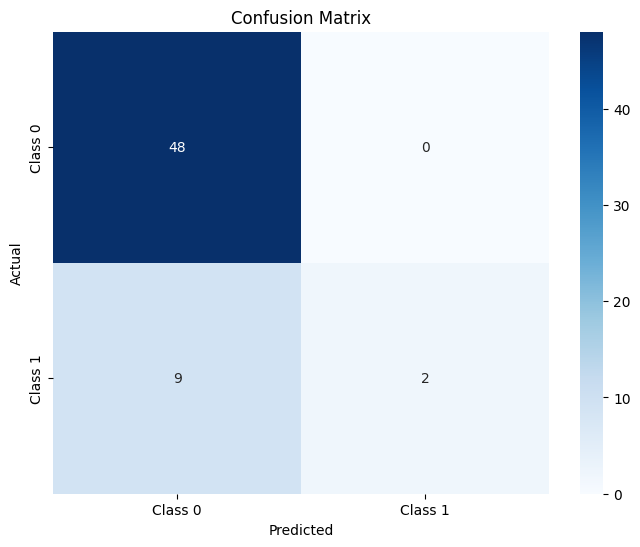

In [28]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Create the confusion matrix
cm = confusion_matrix(x, y_ann_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()